<a href="https://colab.research.google.com/github/francodem/titanic-competition-kaggle/blob/main/kaggle_titanic_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow_decision_forests

In [13]:
# Load TF-DF
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import tensorflow as tf
import tf_keras
import math

In [20]:
# Load dataset
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
gender_df = pd.read_csv("/content/gender_submission.csv")

In [21]:
train_df.shape

(891, 12)

In [22]:
test_df.shape

(418, 11)

In [24]:
gender_df.shape

(418, 2)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test_df.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [27]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
# Convert the dataset into a tf dataset
label = "Survived"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)

# Modifying the test dataset -- adding the survivor label
test_df_2 = test_df.copy()

test_df_2["Survived"] = gender_df["Survived"]

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_2, label=label)

In [60]:
# Specify the model
survivor_model = tfdf.keras.RandomForestModel(verbose=2)

# Train de model
survivor_model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpswd0qton as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'PassengerId': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Pclass': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Name': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Sex': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Age': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'SibSp': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'Parch': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'Ticket': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Fare': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'Cabin': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'Embarked': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>}
Label: Tensor("data_11:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'PassengerId': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' s

Training dataset read in 0:00:00.235517. Found 891 examples.
Training model...


[INFO 24-05-05 04:43:39.8124 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-05-05 04:43:39.8128 UTC kernel.cc:772] Collect training examples
[INFO 24-05-05 04:43:39.8129 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-05-05 04:43:39.8130 UTC kernel.cc:391] Number of batches: 1
[INFO 24-05-05 04:43:39.8130 UTC kernel.cc:392] Number of examples: 891
[INFO 24-05-05 04:43:39.8138 UTC data_spec_inference.cc:305] 147 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Cabin (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-05-05 04:43:39.8142 UTC data_spec_inferen

Model trained in 0:00:00.662698
Compiling model...


Model compiled.


In [62]:
# Evaluate the model
survivor_model.compile(metrics=["accuracy"])

evaluation = survivor_model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 236ms/step - loss: 0.0000e+00 - accuracy: 0.8780

loss: 0.0000
accuracy: 0.8780


In [63]:
# Save the model
survivor_model.save("survivor_model")

In [64]:
# Plot the model
tfdf.model_plotter.plot_model_in_colab(survivor_model, tree_idx=0, max_depth=3)

In [66]:
# See the importance of each var
survivor_model.make_inspector().variable_importances()

{'NUM_NODES': [("PassengerId" (1; #6), 7276.0),
  ("Fare" (1; #3), 5536.0),
  ("Age" (1; #0), 5170.0),
  ("Embarked" (4; #2), 942.0),
  ("Pclass" (1; #7), 678.0),
  ("SibSp" (1; #9), 660.0),
  ("Parch" (1; #5), 514.0),
  ("Sex" (4; #8), 495.0),
  ("Ticket" (4; #10), 493.0)],
 'SUM_SCORE': [("Sex" (4; #8), 39050.94904569164),
  ("Fare" (1; #3), 25789.412802148378),
  ("PassengerId" (1; #6), 24301.55683874496),
  ("Age" (1; #0), 21608.34470385633),
  ("Pclass" (1; #7), 13472.720175744966),
  ("Ticket" (4; #10), 5161.210816341452),
  ("Embarked" (4; #2), 3885.340282600897),
  ("SibSp" (1; #9), 3251.101050514728),
  ("Parch" (1; #5), 1948.7660205658176)],
 'INV_MEAN_MIN_DEPTH': [("Sex" (4; #8), 0.5852317207057445),
  ("Fare" (1; #3), 0.27704633247849764),
  ("Age" (1; #0), 0.22417508011356624),
  ("Pclass" (1; #7), 0.21324028339472162),
  ("PassengerId" (1; #6), 0.1783329965393385),
  ("Ticket" (4; #10), 0.14483472656163557),
  ("Embarked" (4; #2), 0.12892335322426515),
  ("SibSp" (1; #9),

In [67]:
# Model self evaluation
survivor_model.make_inspector().evaluation()

Evaluation(num_examples=891, accuracy=0.8226711560044894, loss=0.6103909554291311, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [68]:
# Plotting the training loss
survivor_model.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=336, accuracy=0.7619047619047619, loss=8.581821804954892, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=886, accuracy=0.8205417607223476, loss=3.3253976358247934, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=891, accuracy=0.8226711560044894, loss=2.206428351961536, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=891, accuracy=0.8204264870931538, loss=1.682355327742837, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=891, accuracy=0.8237934904601572, loss=1.4213881268637416, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=891, accuracy=0.819304152637486, loss=1.1986314923608075, rmse=None, n

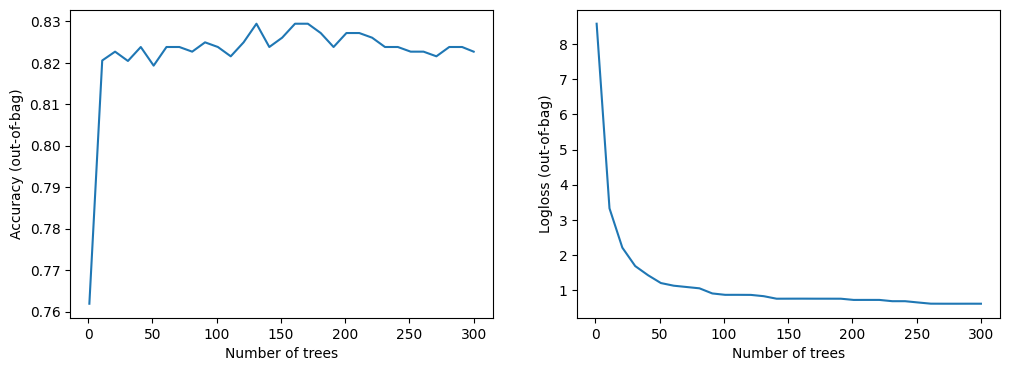

In [70]:
# Plot the self evaluation
import matplotlib.pyplot as plt

logs = survivor_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [84]:
results = survivor_model.predict(test_ds)
print(results.shape)

1/1 [==============================] - 0s 114ms/step
(418, 1)


In [97]:
# Create the CSV file for the Kaggle competition
with open("submission.csv", "w") as f:
  f.write("PassengerId,Survived\n")
  for passenger_id, survived in zip(test_df["PassengerId"], results):
    f.write(f"{passenger_id},{int(round(survived[0]))}\n")

results

array([[0.        ],
       [0.4766663 ],
       [0.02666667],
       [0.07      ],
       [0.5166663 ],
       [0.02      ],
       [0.62333286],
       [0.18333323],
       [0.7833327 ],
       [0.02      ],
       [0.00666667],
       [0.17666657],
       [0.98666584],
       [0.05333334],
       [0.98666584],
       [0.9499992 ],
       [0.01      ],
       [0.2133332 ],
       [0.30333313],
       [0.57666624],
       [0.36333308],
       [0.49333295],
       [0.9899992 ],
       [0.443333  ],
       [0.9499992 ],
       [0.01      ],
       [0.9899992 ],
       [0.1899999 ],
       [0.5199996 ],
       [0.15333326],
       [0.05666667],
       [0.13666661],
       [0.4866663 ],
       [0.15333326],
       [0.3666664 ],
       [0.21666653],
       [0.27333316],
       [0.31666645],
       [0.00666667],
       [0.5399996 ],
       [0.13666661],
       [0.50999963],
       [0.        ],
       [0.9599992 ],
       [0.98666584],
       [0.08333332],
       [0.50999963],
       [0.033

In [98]:
# Submission df
results_df = pd.read_csv("/content/submission.csv")
results_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
